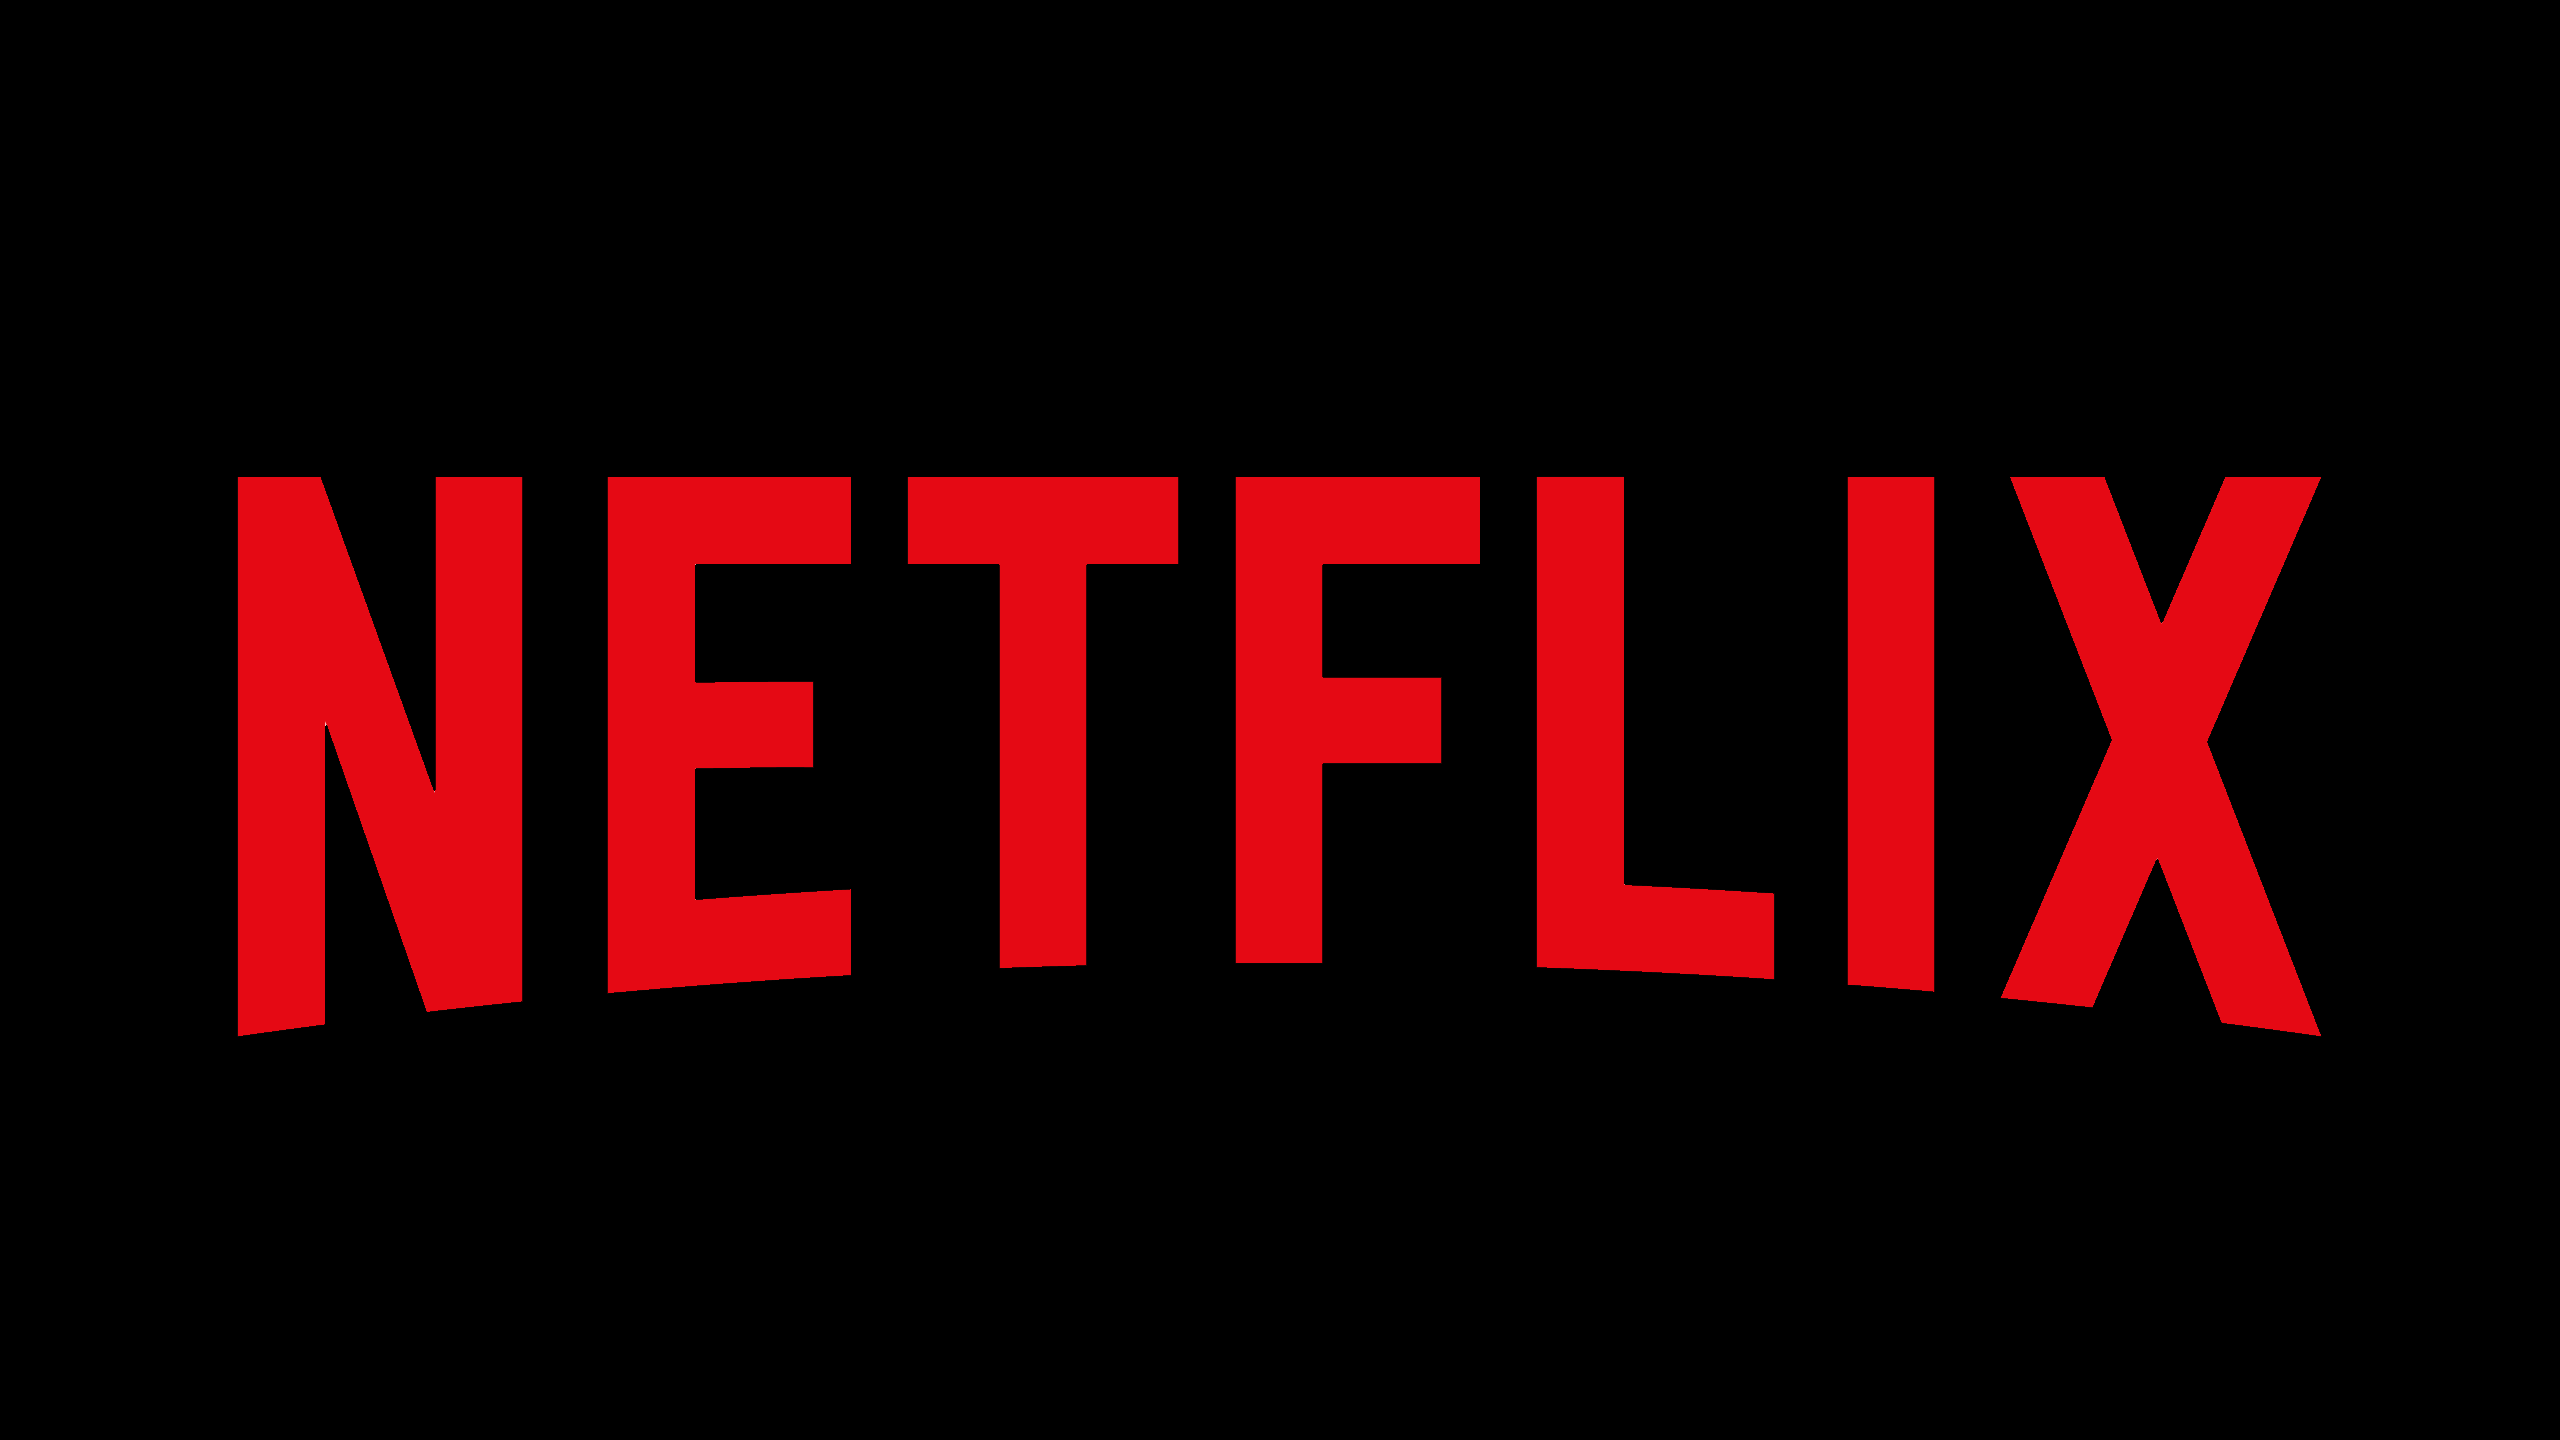

# **Netflix Movie Recommendation System**


Netflix adalah platform streaming yang terkenal di seluruh dunia yang menyediakan berbagai film, acara televisi, dan konten orisinal kepada pelanggan berlangganan. Didirikan pada tahun 1997, Netflix telah menjadi salah satu pemain utama dalam dunia hiburan global dengan jutaan pelanggan di lebih dari 190 negara.

Salah satu fitur utamanya adalah produksi konten orisinal berkualitas tinggi, termasuk serial yang mendapat pujian kritis seperti "Stranger Things," "The Crown," dan "Black Mirror." Netflix telah merevolusi cara kita menikmati hiburan dengan mempopulerkan budaya menonton yang memungkinkan penonton menonton seluruh musim acara dengan kecepatan mereka sendiri.

Platform ini menggunakan sistem rekomendasi yang menyarankan konten yang disesuaikan dengan preferensi individu, meningkatkan pengalaman pengguna. Selain itu, Netflix memiliki antarmuka yang mudah digunakan dan dapat diakses di berbagai perangkat, mulai dari ponsel pintar hingga televisi pintar.

`Dataset` : https://www.kaggle.com/datasets/shivamb/netflix-shows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
netflix_data =pd.read_csv("/Purwadhika/Modul 3 Machine Learning/Portfolio/Netflix.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Ditemukan bahwa masih ada beberapa column yang memiliki missing value

In [4]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']
netflix_movies=netflix_data[netflix_data['type']=='Movie']

## EDA

Text(0.5, 1.0, 'Netflix Show')

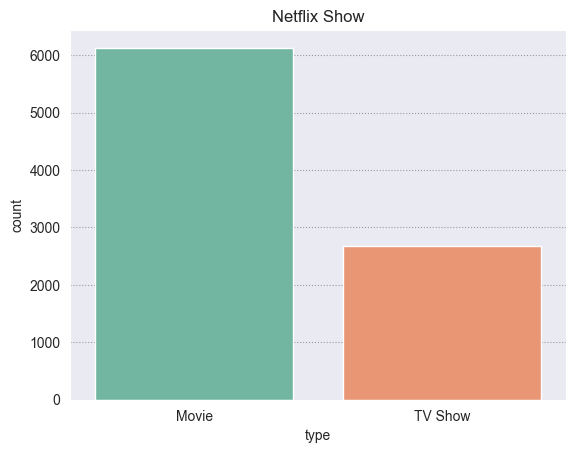

In [5]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.countplot(x="type", data=netflix_data, palette="Set2")
plt.title('Netflix Show')

### RATINGS

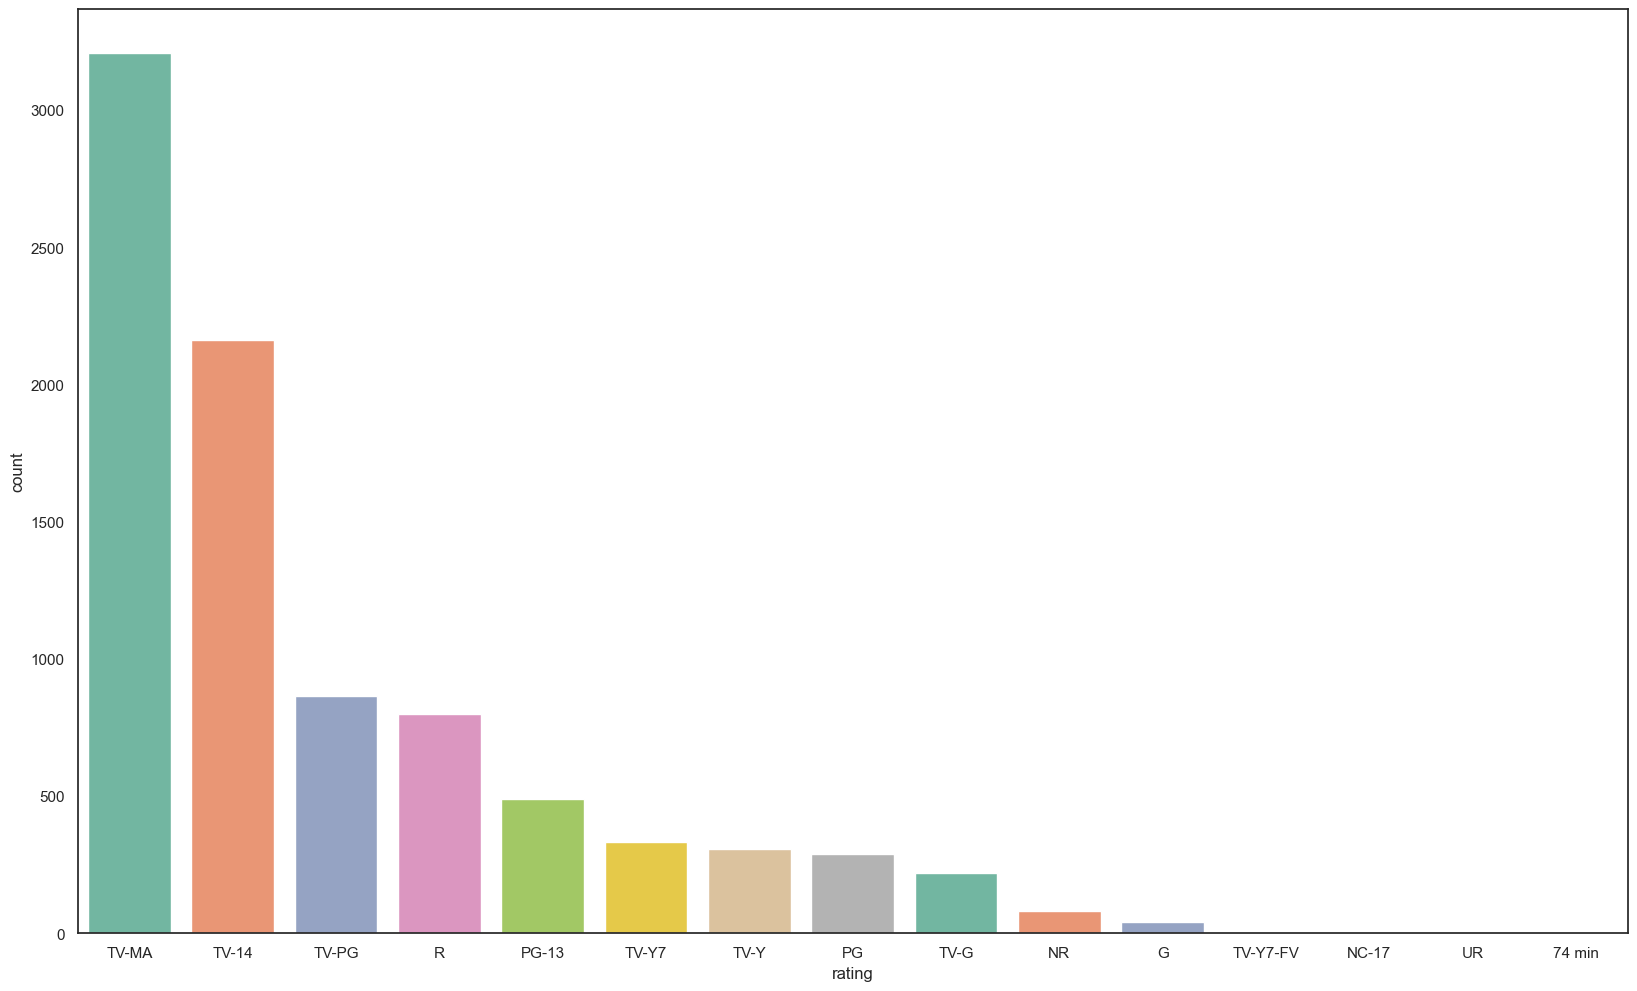

In [6]:
plt.figure(figsize=(20,12))
sns.set(style="white")
ax = sns.countplot(x="rating", data=netflix_data, palette="Set2", order=netflix_data['rating'].value_counts().index[0:15])

`Dari countplot rating ini, kita bisa menyadari bahwa konten TV-MA (Mature Audiences) memiliki jumlah rating tertinggi. Kemudian turun berturut-turut pada rating TV-14 (Materi yang mungkin tidak cocok untuk anak di bawah usia 14 tahun) dan TV-PG (Panduan Orang Tua).`

### YEAR

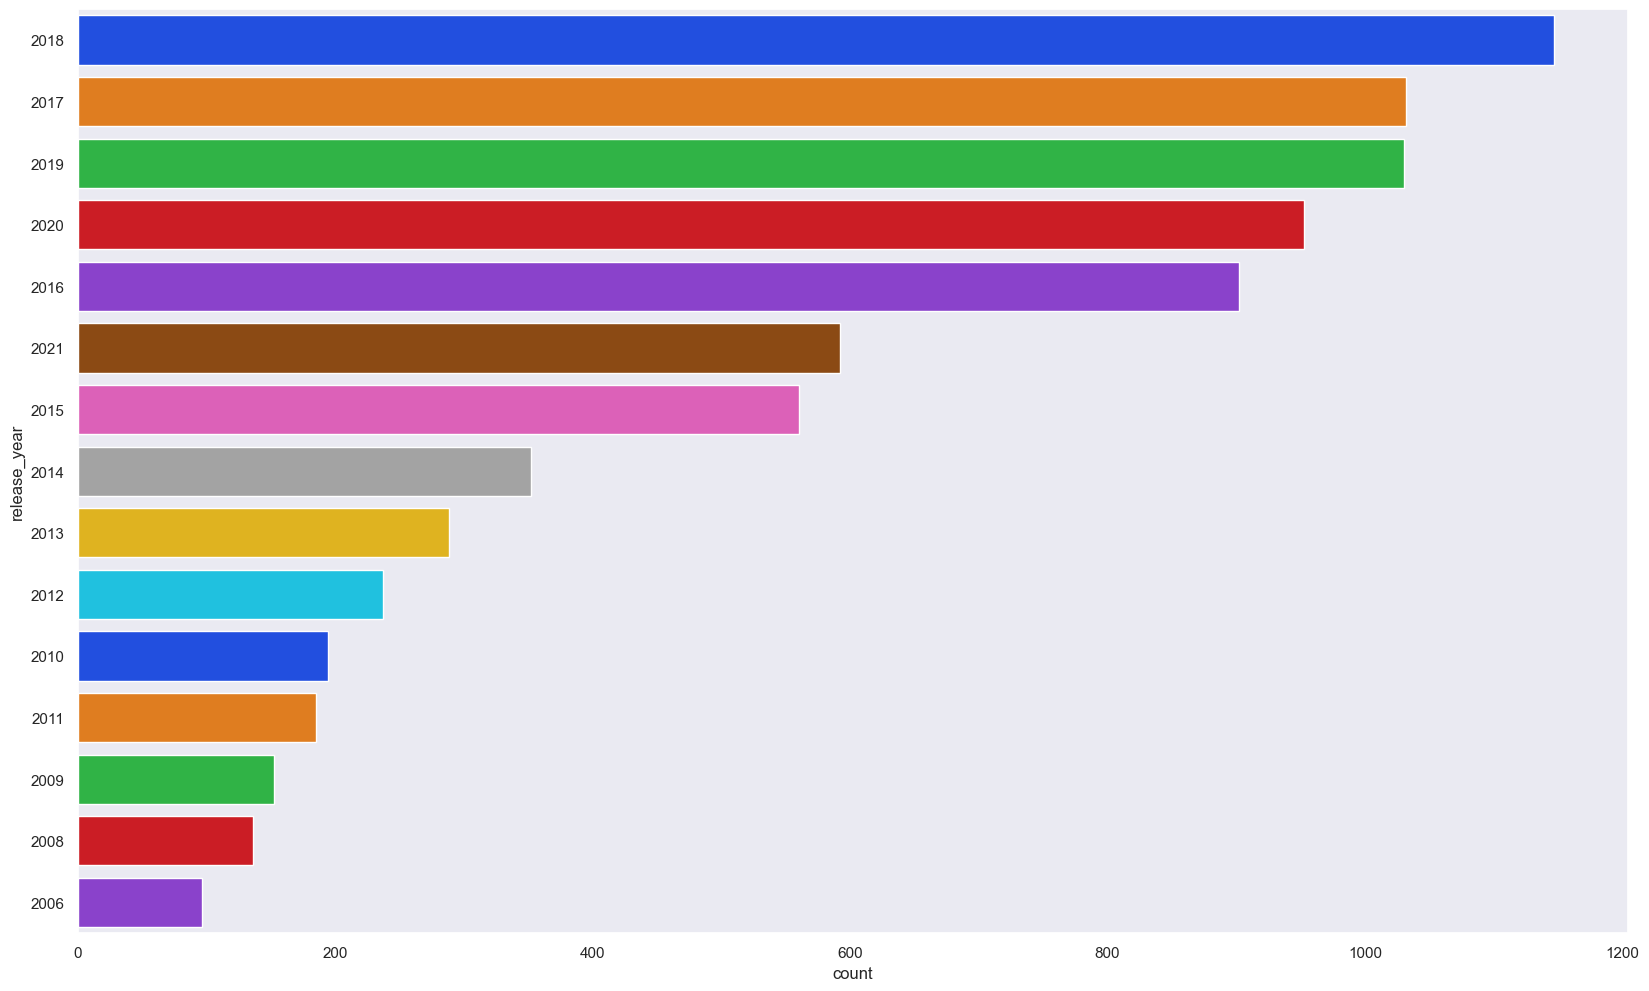

In [7]:
plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="release_year", data=netflix_data, palette="bright", order=netflix_data['release_year'].value_counts().index[0:15])

`Grafik ini menunjukkan bahwa sebagian besar konten diproduksi pada tahun 2018 dan 2017. Fakta menariknya adalah pada tahun 2019, 2020, dan 2021 jumlah konten yang diproduksi rendah. Hal ini sebagian besar disebabkan oleh pandemi Covid-19.`

### RECOMMENDATION SYSTEM

`Skor TF-IDF (Term Frequency-Inverse Document Frequency) adalah frekuensi kemunculan suatu kata dalam sebuah dokumen yang dinormalkan berdasarkan jumlah dokumen di mana kata tersebut muncul. Hal ini dilakukan untuk mengurangi pentingnya kata-kata yang sering muncul dalam ringkasan plot, dan dengan demikian, mengurangi signifikansinya dalam menghitung skor kesamaan akhir.`

In [8]:
indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

## Content based filtering on multiple metrics ##

* **Title**
* **Cast**
* **Director**
* **Listed in**
* **Plot**

**Transforming NULLs to empty strings**

In [9]:
missingfilled=netflix_data.fillna('')
missingfilled.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


**Data cleaning. Converting all words to their lower case form**

In [10]:
def data_cleaning(x):
        return str.lower(x.replace(" ", ""))

**Selecting features which are going to filter model**

In [11]:
features=['title','director','cast','listed_in','description']
missingfilled=missingfilled[features]

In [12]:
for feature in features:
    missingfilled[feature] = missingfilled[feature].apply(data_cleaning)
    
missingfilled.head(5)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,,,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...


In [13]:
def content_include(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [14]:
missingfilled['soup'] = missingfilled.apply(content_include, axis=1)

#### Defining Recommendation System Function

Cosine Similarity
- Membandingkan karakteristik dari semua film dengan film yang telah dinonton

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
countvec = CountVectorizer(stop_words='english')
countvec_matrix = countvec.fit_transform(missingfilled['soup'])

cosine_sim2 = cosine_similarity(countvec_matrix, countvec_matrix)

In [ ]:
missingfilled=missingfilled.reset_index()
indices = pd.Series(missingfilled.index, index=missingfilled['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]

`FOR YOUR INFORMATION`

Definisi Fungsi:

def get_recommendations_new(title, cosine_sim=cosine_sim)::
Baris ini mendefinisikan fungsi get_recommendations_new, yang mengambil dua parameter: title (judul film yang digunakan sebagai dasar rekomendasi) dan cosine_sim (matriks kesamaan kosinus yang telah dihitung sebelumnya). Nilai default untuk cosine_sim diasumsikan akan diberikan dari sumber lain.
Membersihkan Judul Input:

title = title.replace(' ', '').lower():
Baris ini menghapus spasi dan mengonversi judul input title menjadi huruf kecil. Ini dilakukan untuk memastikan format yang konsisten dalam perbandingan.
Mencari Indeks:

idx = indices[title]:
Ini mencari indeks dari judul film yang telah dibersihkan dalam dataset. Indeks ini digunakan untuk menemukan film dalam matriks kesamaan.
Menghitung Skor Kesamaan:

sim_scores = list(enumerate(cosine_sim[idx])):
Baris ini menghitung kesamaan kosinus antara film input dan semua film lain dalam dataset. Hasilnya adalah daftar tupel di mana setiap tupel berisi indeks film dan skor kesamaan kosinusnya terhadap film input.
Mengurutkan Berdasarkan Kesamaan:

sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True):
Daftar skor kesamaan diurutkan secara menurun, sehingga film yang paling mirip muncul di awal daftar.
Memilih Rekomendasi Teratas:

sim_scores = sim_scores[1:11]:
Fungsi ini mengesampingkan entri pertama (film input sendiri, dengan skor kesamaan 1) dan memilih 10 film teratas yang paling mirip berdasarkan daftar skor yang telah diurutkan.
Mengambil Indeks Film:

movie_indices = [i[0] for i in sim_scores]:
Langkah ini mengekstrak indeks film-film yang direkomendasikan dari daftar skor kesamaan yang telah diurutkan.
Mengembalikan Rekomendasi:

return netflix_data['title'].iloc[movie_indices]:
Fungsi ini mengembalikan judul dari 10 film yang direkomendasikan dengan mengindeks kolom 'title' dari dataset dengan indeks film yang diperoleh dalam langkah sebelumnya.

In [ ]:
get_recommendations_new('Squid Game', cosine_sim2).head()

3288               Chief of Staff
5438    Under the Black Moonlight
1412                     Wish You
3473                       The K2
3684                    Kakegurui
Name: title, dtype: object

In [ ]:
get_recommendations_new('Peaky Blinders', cosine_sim2).head()

3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
Name: title, dtype: object

In [ ]:
get_recommendations_new('Black Mirror', cosine_sim2)

3045                                       Dracula
3551           The Dark Crystal: Age of Resistance
4262                                Watership Down
1301                               Behind Her Eyes
7017    How to Live Mortgage Free with Sarah Beeny
2979                                  THE STRANGER
5365                                         Vexed
69                  Stories by Rabindranath Tagore
1056                                Ajaibnya Cinta
1603                                  Alien Worlds
Name: title, dtype: object